In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

import kaleido

In [54]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

In [55]:
def assign_to_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

In [56]:
def update_centroids(data, clusters, num_clusters):
    new_centroids = np.zeros((num_clusters, data.shape[1]))
    for cluster in range(num_clusters):
        cluster_points = [data[i] for i in range(len(data)) if clusters[i] == cluster]
        if cluster_points:
            new_centroids[cluster] = np.mean(cluster_points, axis=0)
    return new_centroids

In [57]:
data = pd.read_csv('Country-data.csv')
df1 = data.copy()
columns_to_normalize = df1.columns.difference(['country'])
scaler = MinMaxScaler()

# Applica la normalizzazione solo sulle colonne numeriche
df1[columns_to_normalize] = scaler.fit_transform(df1[columns_to_normalize])

m1 = df1.drop(columns=['country']).values

In [58]:
num_clusters = 3
initial_centroids = np.array([m1[i] for i in np.random.choice(range(len(m1)), num_clusters, replace=False)])

max_iterations = 100
tolerance = 1e-4

centroids = initial_centroids
for i in range(max_iterations):
    old_centroids = centroids
    clusters = assign_to_clusters(m1, centroids)
    centroids = update_centroids(m1, clusters, num_clusters)
    if np.all(np.abs(centroids - old_centroids) < tolerance):
        break

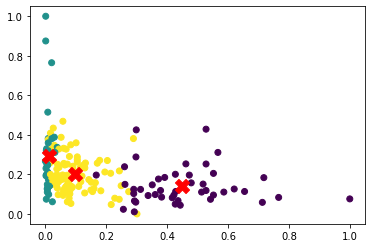

In [59]:
plt.scatter(m1[:, 0], m1[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.show()

In [60]:
df1['Class'] = clusters
data['Class'] = clusters

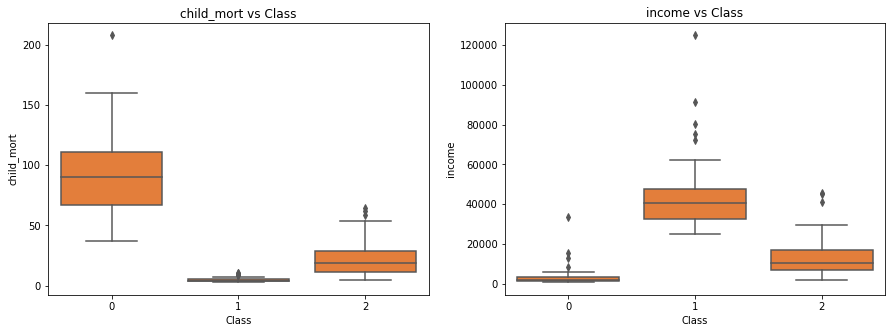

In [61]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

In [62]:
df1['Class'].loc[df1['Class'] == 0] = 'Help Needed'
df1['Class'].loc[df1['Class'] == 1] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'Might Need Help'

In [63]:

fig = px.choropleth(df1[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')